In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/Team-Fermata-Energy/'[EXTERNAL] breakthrough_tech_ai_f24/data'
PATH = "/content/drive/MyDrive/Team-Fermata-Energy/[EXTERNAL] breakthrough_tech_ai_f24/data"

building_data  data_dictionary.tsv  metadata.csv  metadata.gsheet


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
md_full = pd.read_csv(PATH + "/metadata.csv")

FOLDER_PATH = PATH + "/building_data"
all_possible_ids = set(range(1, md_full['bldg_id'].max()+1))
existing_ids = set(map(int,os.listdir(FOLDER_PATH)))

missing_ids = all_possible_ids.difference(existing_ids)

md = md_full[~md_full['bldg_id'].isin(missing_ids)]

In [ ]:
md_full

,bldg_id,in.building_america_climate_zone,in.iso_rto_region,in.state,in.cluster_id,in.cluster_name,in.heating_fuel,in.interior_lighting_generation,in.floor_area_category,in.service_water_heating_fuel,in.comstock_building_type,in.comstock_building_type_group,in.vintage,in.sqft,in.nhgis_county_gisjoin
0,74,Hot-Humid,NaN,AL,53.0,Central Alabama,NaturalGas,gen2_t8_halogen,10001_25000,Electricity,Outpatient,Healthcare,1980 to 1989,17500.0,G0101010
1,115,Hot-Humid,NaN,AL,53.0,Central Alabama,Electricity,gen4_led,10001_25000,Electricity,Outpatient,Healthcare,1960 to 1969,17500.0,G0101010
2,126,Mixed-Humid,NaN,AL,53.0,Central Alabama,Electricity,gen2_t8_halogen,10001_25000,Electricity,Outpatient,Healthcare,1980 to 1989,17500.0,G0100150
3,293,Hot-Humid,NaN,AL,53.0,Central Alabama,NaturalGas,gen2_t8_halogen,10001_25000,NaturalGas,Outpatient,Healthcare,1990 to 1999,17500.0,G0101010
4,313,Mixed-Humid,NaN,AL,53.0,Central Alabama,NaturalGas,gen2_t8_halogen,500001_1mil,NaturalGas,Hospital,Healthcare,1980 to 1989,750000.0,G0100730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346180,349996,Cold,NaN,WY,36.0,the Cheyenne-Denver-Colorado Springs Area,NaturalGas,gen4_led,_1000,Electricity,SmallOffice,Office,Before 1946,1000.0,G5600210
346181,349997,Cold,NaN,WY,57.0,Rural Rocky Mountains North,NaturalGas,gen1_t12_incandescent,1001_5000,NaturalGas,RetailStripmall,Mercantile,1980 to 1989,3000.0,G5600190
346182,349998,Cold,NaN,WY,68.0,"Small Urban Areas in the Dakotas, Idaho, Monta...",NaturalGas,gen1_t12_incandescent,10001_25000,Electricity,Warehouse,Warehouse and Storage,1990 to 1999,17500.0,G5600250
346183,349999,Cold,NaN,WY,36.0,the Cheyenne-Denver-Colorado Springs Area,NaturalGas,gen4_led,100001_200000,NaturalGas,Warehouse,Warehouse and Storage,1970 to 1979,150000.0,G5600210


In [ ]:
md.head()

,bldg_id,in.building_america_climate_zone,in.iso_rto_region,in.state,in.cluster_id,in.cluster_name,in.heating_fuel,in.interior_lighting_generation,in.floor_area_category,in.service_water_heating_fuel,in.comstock_building_type,in.comstock_building_type_group,in.vintage,in.sqft,in.nhgis_county_gisjoin
410,48709,Hot-Dry,NaN,CA,109.0,CA Climate Zone 9,Electricity,gen4_led,200001_500000,Electricity,LargeOffice,Office,1960 to 1969,350000.0,G0600370
442,51940,Hot-Dry,NaN,CA,105.0,CA Climate Zone 5,Electricity,gen2_t8_halogen,200001_500000,Electricity,LargeOffice,Office,1960 to 1969,350000.0,G0600370
494,58658,Cold,NaN,CO,36.0,the Cheyenne-Denver-Colorado Springs Area,NaturalGas,gen2_t8_halogen,100001_200000,Electricity,LargeOffice,Office,Before 1946,150000.0,G0800310
592,70894,Hot-Humid,NaN,FL,55.0,Florida,Electricity,gen3_t5_cfl,100001_200000,Electricity,LargeOffice,Office,1960 to 1969,150000.0,G1200860
905,105885,Hot-Humid,NaN,HI,42.0,Hawaii,NaturalGas,gen1_t12_incandescent,500001_1mil,NaturalGas,LargeHotel,Lodging,1970 to 1979,750000.0,G1500030


In [ ]:
md.shape

(39002, 15)

In [ ]:
md.columns

Index(['bldg_id', 'in.building_america_climate_zone', 'in.iso_rto_region',
       'in.state', 'in.cluster_id', 'in.cluster_name', 'in.heating_fuel',
       'in.interior_lighting_generation', 'in.floor_area_category',
       'in.service_water_heating_fuel', 'in.comstock_building_type',
       'in.comstock_building_type_group', 'in.vintage', 'in.sqft',
       'in.nhgis_county_gisjoin'],
      dtype='object')

In [ ]:
md['in.building_america_climate_zone'].unique()

array(['Hot-Dry', 'Cold', 'Hot-Humid', 'Mixed-Humid', 'Very Cold',
       'Subarctic', 'Mixed-Dry', 'Marine'], dtype=object)

In [ ]:
counts = md['in.building_america_climate_zone'].value_counts()
print(counts)

in.building_america_climate_zone
Mixed-Humid    13019
Cold           11630
Hot-Humid       8252
Hot-Dry         4158
Marine          1332
Mixed-Dry        333
Very Cold        272
Subarctic          6
Name: count, dtype: int64


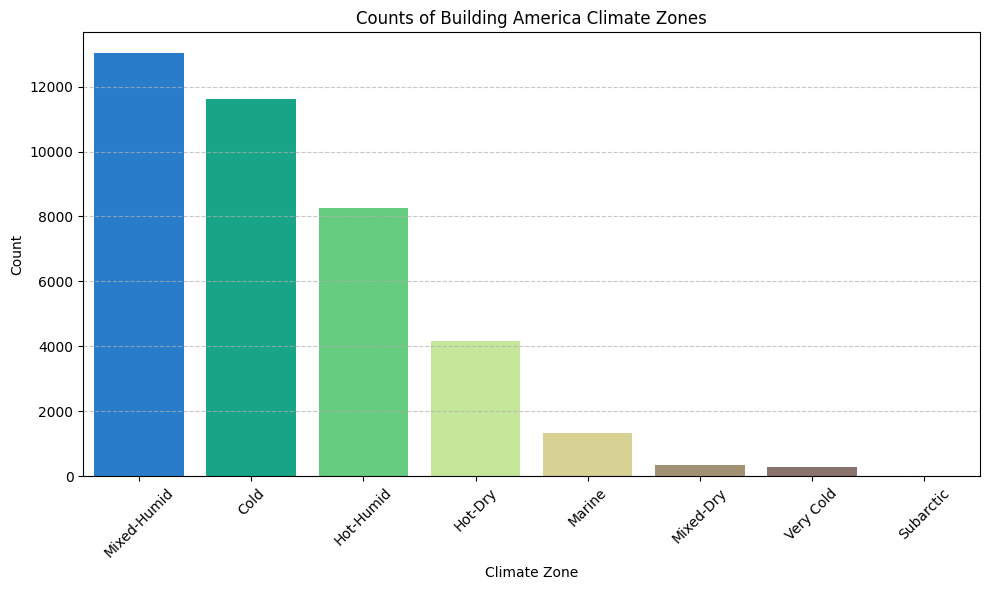

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='terrain')
plt.title('Counts of Building America Climate Zones')
plt.xlabel('Climate Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
# Merge 'Subarctic' with 'Very Cold'
md['in.building_america_climate_zone'] = md['in.building_america_climate_zone'].replace('Subarctic', 'Very Cold')

<ipython-input-15-eb23d006db0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md['in.building_america_climate_zone'] = md['in.building_america_climate_zone'].replace('Subarctic', 'Very Cold')


In [ ]:
md['in.building_america_climate_zone'].value_counts()

,count
in.building_america_climate_zone,
Mixed-Humid,13019
Cold,11630
Hot-Humid,8252
Hot-Dry,4158
Marine,1332
Mixed-Dry,333
Very Cold,278


In [ ]:
sample_size = 15

# Sample n buildings from each climate zone
sampled_buildings = md.groupby('in.building_america_climate_zone').apply(lambda x: x.sample(n=min(sample_size, len(x)), random_state=42))

# Reset index after groupby operation
sampled_buildings = sampled_buildings.reset_index(drop=True)

# Get the list of building IDs
building_ids = sampled_buildings['bldg_id'].tolist()

print(f"Selected building IDs for analysis: {building_ids[:10]}...")


Selected building IDs for analysis: [109580, 167620, 114863, 107726, 323218, 246421, 173537, 241594, 171462, 162481]...


In [ ]:
sampled_buildings

,bldg_id,in.building_america_climate_zone,in.iso_rto_region,in.state,in.cluster_id,in.cluster_name,in.heating_fuel,in.interior_lighting_generation,in.floor_area_category,in.service_water_heating_fuel,in.comstock_building_type,in.comstock_building_type_group,in.vintage,in.sqft,in.nhgis_county_gisjoin
0,109580,Cold,NaN,IL,82.0,the Chicago to Green Bay and Madison Area,NaturalGas,gen2_t8_halogen,100001_200000,Electricity,RetailStripmall,Mercantile,1970 to 1979,150000.0,G1700970
1,167620,Cold,MISO,MI,16.0,Rural Southern Michigan and the Toledo Area,NaturalGas,gen2_t8_halogen,10001_25000,NaturalGas,Warehouse,Warehouse and Storage,1990 to 1999,17500.0,G2600990
2,114863,Cold,PJM,IL,17.0,Rural Lower Midwest and High Plains,Electricity,gen4_led,100001_200000,Electricity,Warehouse,Warehouse and Storage,Before 1946,150000.0,G1701410
3,107726,Cold,NaN,ID,9.0,Boise-Twin Falls,Electricity,gen1_t12_incandescent,10001_25000,Electricity,RetailStandalone,Mercantile,Before 1946,17500.0,G1600270
4,323218,Cold,NaN,UT,66.0,the Northwestern Utah and Pocatello Area,NaturalGas,gen2_t8_halogen,10001_25000,NaturalGas,RetailStripmall,Mercantile,1970 to 1979,17500.0,G4900570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,62134,Very Cold,NaN,CO,12.0,CO Mountain Rural,Electricity,gen1_t12_incandescent,5001_10000,NaturalGas,RetailStripmall,Mercantile,1960 to 1969,7500.0,G0801070
101,174755,Very Cold,MISO,MN,77.0,the Duluth-Grand Forks-Fargo Area,Electricity,gen2_t8_halogen,10001_25000,Electricity,Warehouse,Warehouse and Storage,1960 to 1969,17500.0,G2701370
102,236385,Very Cold,MISO,ND,72.0,Rural Midwest North,NaturalGas,gen4_led,1001_5000,NaturalGas,RetailStripmall,Mercantile,1970 to 1979,3000.0,G3800490
103,164520,Very Cold,MISO,MI,72.0,Rural Midwest North,NaturalGas,gen2_t8_halogen,10001_25000,NaturalGas,RetailStripmall,Mercantile,Before 1946,17500.0,G2601310


In [ ]:
ex_bldg_id = building_ids[0]

ex_bldg_load = pd.read_csv(f'{PATH}/building_data/{ex_bldg_id}/load.csv')
ex_bldg_weather = pd.read_csv(f'{PATH}/building_data/{ex_bldg_id}/weather.csv')

In [ ]:
ex_bldg_load.head(10)

,timestamp,out.electricity.total.energy_consumption
0,2018-01-01 00:15:00,43.930434
1,2018-01-01 00:30:00,42.755358
2,2018-01-01 00:45:00,40.084597
3,2018-01-01 01:00:00,52.588267
4,2018-01-01 01:15:00,36.894730
5,2018-01-01 01:30:00,36.170116
6,2018-01-01 01:45:00,36.012440
7,2018-01-01 02:00:00,35.751398
8,2018-01-01 02:15:00,35.561851
9,2018-01-01 02:30:00,35.313115


In [ ]:
ex_bldg_load.shape

(35040, 2)

In [ ]:
ex_bldg_load.columns

Index(['timestamp', 'out.electricity.total.energy_consumption'], dtype='object')

In [ ]:
ex_bldg_weather.head(10)

,date_time,Dry Bulb Temperature [°C],Relative Humidity [%]
0,2018-01-01 01:00:00,-20.6,54.738637
1,2018-01-01 02:00:00,-21.1,54.606067
2,2018-01-01 03:00:00,-21.7,57.878891
3,2018-01-01 04:00:00,-21.7,54.446369
4,2018-01-01 05:00:00,-21.7,57.878891
5,2018-01-01 06:00:00,-21.7,57.878894
6,2018-01-01 07:00:00,-22.2,60.768539
7,2018-01-01 08:00:00,-22.2,60.768544
8,2018-01-01 09:00:00,-21.1,57.447127
9,2018-01-01 10:00:00,-20.6,58.157974


In [ ]:
ex_bldg_weather.shape

(8760, 3)

In [ ]:
ex_bldg_weather.columns

Index(['date_time', 'Dry Bulb Temperature [°C]', 'Relative Humidity [%]'], dtype='object')

In [ ]:
# Initialize an empty list to hold DataFrames for all buildings
all_buildings_data = []

# Step 2: Load, aggregate, and merge data for each sampled building
for _, row in sampled_buildings.iterrows():
    building_id = row['bldg_id']
    climate_zone = row['in.building_america_climate_zone']

    # Load building's load and weather data
    load_data = pd.read_csv(f'{PATH}/building_data/{building_id}/load.csv')
    weather_data = pd.read_csv(f'{PATH}/building_data/{building_id}/weather.csv')

    # Convert timestamps to datetime for merging and aggregation
    load_data['timestamp'] = pd.to_datetime(load_data['timestamp'])
    weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

    # Aggregate the load data to hourly by summing up the 15-minute intervals for each hour
    load_data_hourly = load_data.resample('H', on='timestamp').sum().reset_index()

    # Merge hourly load data with weather data on timestamp
    building_data = pd.merge(
        load_data_hourly,
        weather_data,
        left_on='timestamp',
        right_on='date_time',
        how='inner'
    )

    # Drop the date_time column since its redundant // the same values as timestamp
    building_data = building_data.drop(columns=['date_time'])

    # Step 3: Assign climate zone and building_id
    building_data['climate_zone'] = climate_zone
    building_data['bldg_id'] = building_id

    # Append to the list
    all_buildings_data.append(building_data)

# Step 4: Combine data for all sampled buildings
combined_df = pd.concat(all_buildings_data, ignore_index=True)

# Drop rows where the timestamp date is '2019-01-01' or '2018-01-01' to remove edge cases
combined_df = combined_df.loc[~combined_df['timestamp'].dt.date.isin([pd.to_datetime('2019-01-01').date(), pd.to_datetime('2018-01-01').date()])]

# Rename columns by reassigning, not using inplace to avoid warnings
combined_df = combined_df.rename(columns={
    'out.electricity.total.energy_consumption': 'energy_consumption',
    'Dry Bulb Temperature [°C]': 'Temp (C)'})

In [ ]:
combined_df

,timestamp,energy_consumption,Temp (C),Relative Humidity [%],climate_zone,bldg_id
23,2018-01-02 00:00:00,190.107779,-19.400000,64.567345,Cold,109580
24,2018-01-02 01:00:00,149.667384,-20.000000,68.383863,Cold,109580
25,2018-01-02 02:00:00,141.639709,-20.000000,68.383862,Cold,109580
26,2018-01-02 03:00:00,152.586253,-20.000000,65.075737,Cold,109580
27,2018-01-02 04:00:00,138.421932,-20.600000,68.941156,Cold,109580
...,...,...,...,...,...,...
919794,2018-12-31 19:00:00,150.595873,-23.000000,72.915000,Very Cold,174089
919795,2018-12-31 20:00:00,126.744194,-24.000000,73.820000,Very Cold,174089
919796,2018-12-31 21:00:00,64.660289,-25.666667,78.220000,Very Cold,174089
919797,2018-12-31 22:00:00,54.623753,-26.666667,78.036667,Very Cold,174089


In [ ]:
combined_df['climate_zone'].value_counts()

,count
climate_zone,
Cold,131040
Hot-Dry,131040
Hot-Humid,131040
Marine,131040
Mixed-Dry,131040
Mixed-Humid,131040
Very Cold,131040


In [ ]:
# Get total daily load for each building
daily_load = combined_df.groupby(['bldg_id', 'climate_zone', combined_df['timestamp'].dt.date]).agg({'energy_consumption': 'sum', 'Temp (C)': 'mean'}).reset_index()
daily_load.rename(columns={'timestamp': 'date', 'Temp (C)': 'avg_temp (C)'}, inplace=True)
daily_load

,bldg_id,climate_zone,date,energy_consumption,avg_temp (C)
0,576,Hot-Humid,2018-01-02,497.564753,-2.233333
1,576,Hot-Humid,2018-01-03,488.053535,0.620833
2,576,Hot-Humid,2018-01-04,489.032962,0.570833
3,576,Hot-Humid,2018-01-05,490.667097,0.250000
4,576,Hot-Humid,2018-01-06,499.548434,1.454167
...,...,...,...,...,...
38215,323218,Cold,2018-12-27,1432.856049,-4.549931
38216,323218,Cold,2018-12-28,1440.466757,-4.331597
38217,323218,Cold,2018-12-29,1424.832975,-6.541944
38218,323218,Cold,2018-12-30,1027.882051,-2.649931


In [ ]:
# For each day, and each climate zone, get the average energy consumption per building in that particular climate zone

zone_avg_daily_load = daily_load.groupby(['climate_zone', 'date']).agg({'energy_consumption': 'mean'}).reset_index()
zone_avg_daily_load.rename(columns={'energy_consumption': 'avg_daily_load_per_building'}, inplace=True)
zone_avg_daily_load[zone_avg_daily_load['climate_zone']=='Hot-Humid']

,climate_zone,date,avg_daily_load_per_building
728,Hot-Humid,2018-01-02,2900.484900
729,Hot-Humid,2018-01-03,2727.567669
730,Hot-Humid,2018-01-04,2488.796706
731,Hot-Humid,2018-01-05,2188.653896
732,Hot-Humid,2018-01-06,1901.464825
...,...,...,...
1087,Hot-Humid,2018-12-27,1948.571959
1088,Hot-Humid,2018-12-28,2017.002934
1089,Hot-Humid,2018-12-29,1730.914086
1090,Hot-Humid,2018-12-30,1744.876772


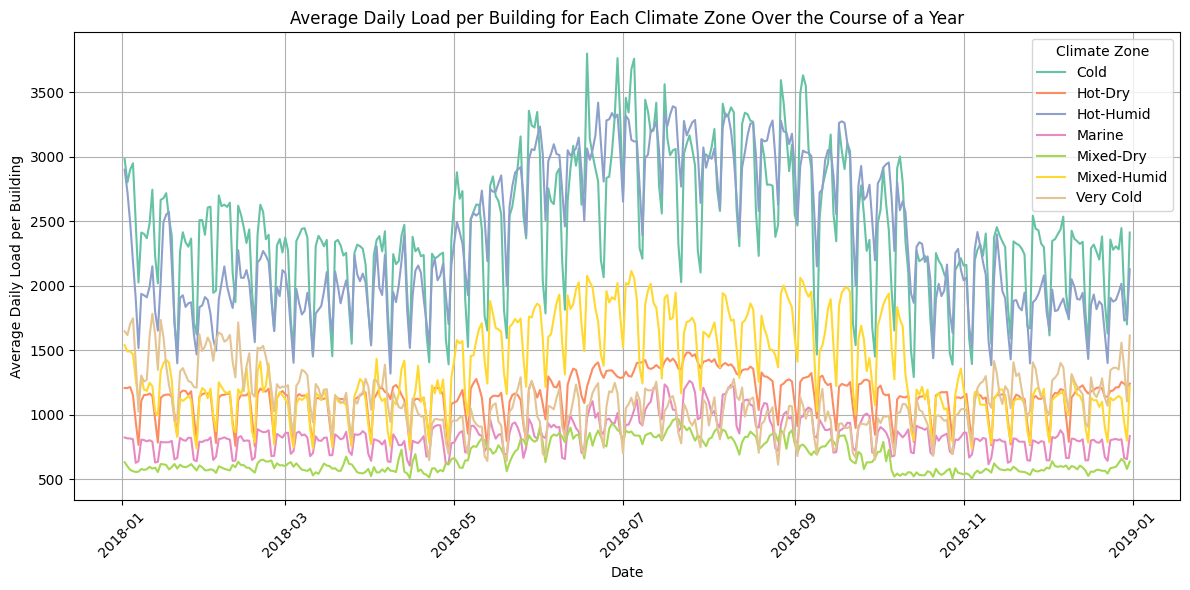

In [ ]:
# Visualize average energy comsumption per building per day for each climate zone
plt.figure(figsize=(12, 6))
sns.lineplot(data=zone_avg_daily_load, x='date', y='avg_daily_load_per_building', hue='climate_zone', palette='Set2')
plt.title('Average Daily Load per Building for Each Climate Zone Over the Course of a Year')
plt.xlabel('Date')
plt.ylabel('Average Daily Load per Building')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.show()

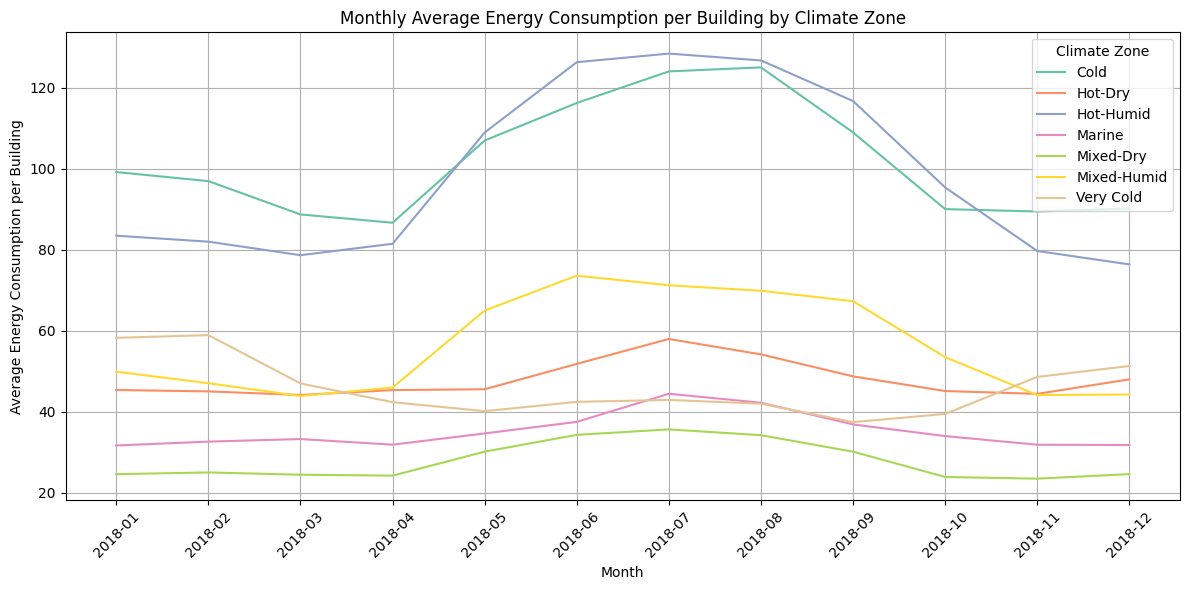

In [ ]:
# Convert timestamp to month and year
combined_df['month'] = combined_df['timestamp'].dt.to_period('M').astype(str)

# Calculate the monthly average energy consumption per building
monthly_avg_per_building = combined_df.groupby(['month', 'climate_zone', 'bldg_id'])['energy_consumption'].mean().reset_index()

# Calculate the monthly average energy consumption per climate zone
monthly_avg_by_zone = monthly_avg_per_building.groupby(['month', 'climate_zone'])['energy_consumption'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_by_zone, x='month', y='energy_consumption', hue='climate_zone', palette='Set2')
plt.title('Monthly Average Energy Consumption per Building by Climate Zone')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption per Building')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.show()


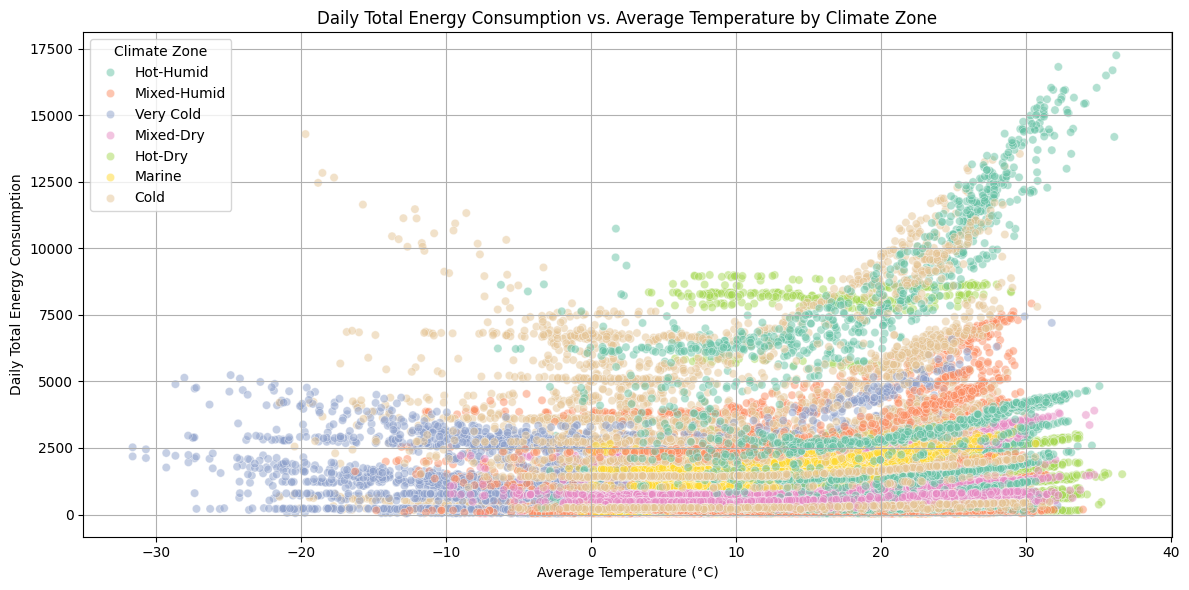

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=daily_load, x='avg_temp (C)', y='energy_consumption', hue='climate_zone', palette='Set2', alpha=0.5)
plt.title('Daily Total Energy Consumption vs. Average Temperature by Climate Zone')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Daily Total Energy Consumption')
plt.grid(True)
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.show()



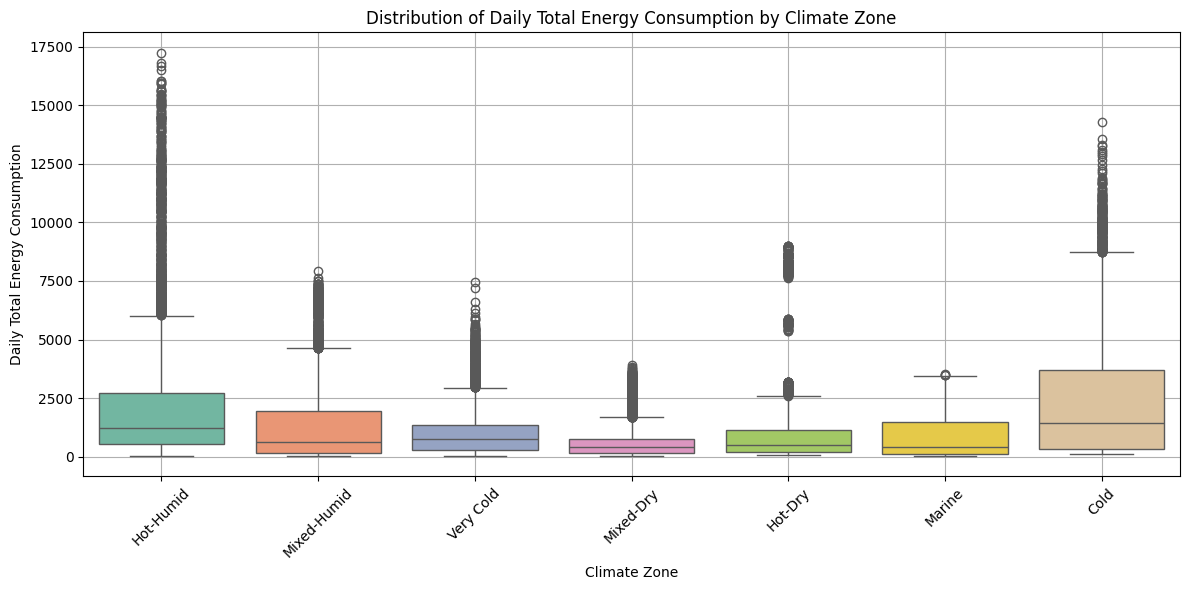

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_load, x='climate_zone', y='energy_consumption', hue='climate_zone', palette='Set2')
plt.title('Distribution of Daily Total Energy Consumption by Climate Zone')
plt.xlabel('Climate Zone')
plt.ylabel('Daily Total Energy Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


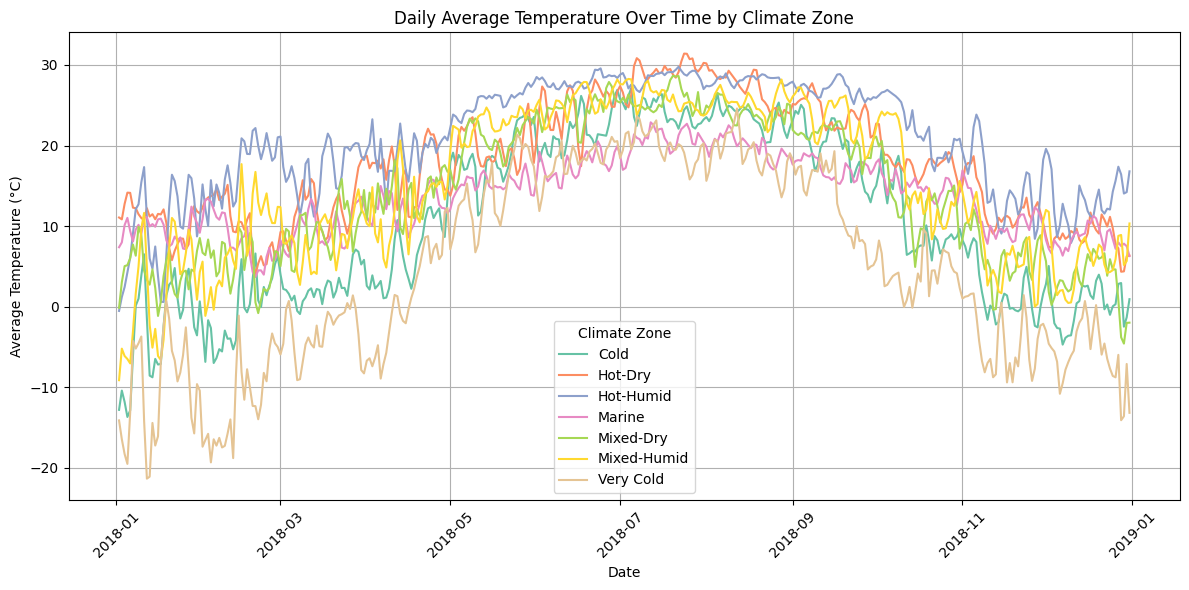

In [ ]:
# Step 1: Aggregate daily average temperature per climate zone
daily_temp_avg = daily_load.groupby(['date', 'climate_zone'])['avg_temp (C)'].mean().reset_index()

# Step 2: Plot the aggregated data
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_temp_avg, x='date', y='avg_temp (C)', hue='climate_zone', palette='Set2')
plt.title('Daily Average Temperature Over Time by Climate Zone')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend(title='Climate Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


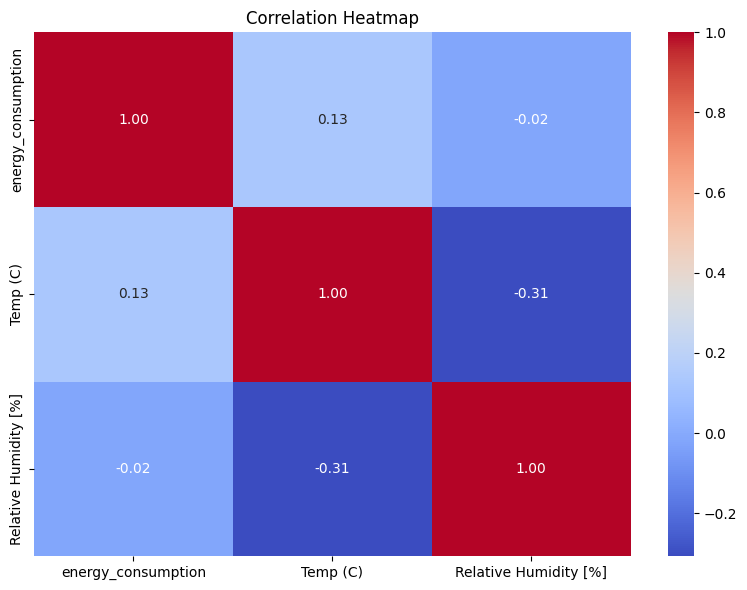

In [ ]:
# Compute the correlation matrix
correlation_matrix = combined_df[['energy_consumption', 'Temp (C)', 'Relative Humidity [%]']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
